In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from collections import Counter

# Load gambar

Total gambar yang di-load: 300
Kategori: ['nantu', 'palapi', 'uru']


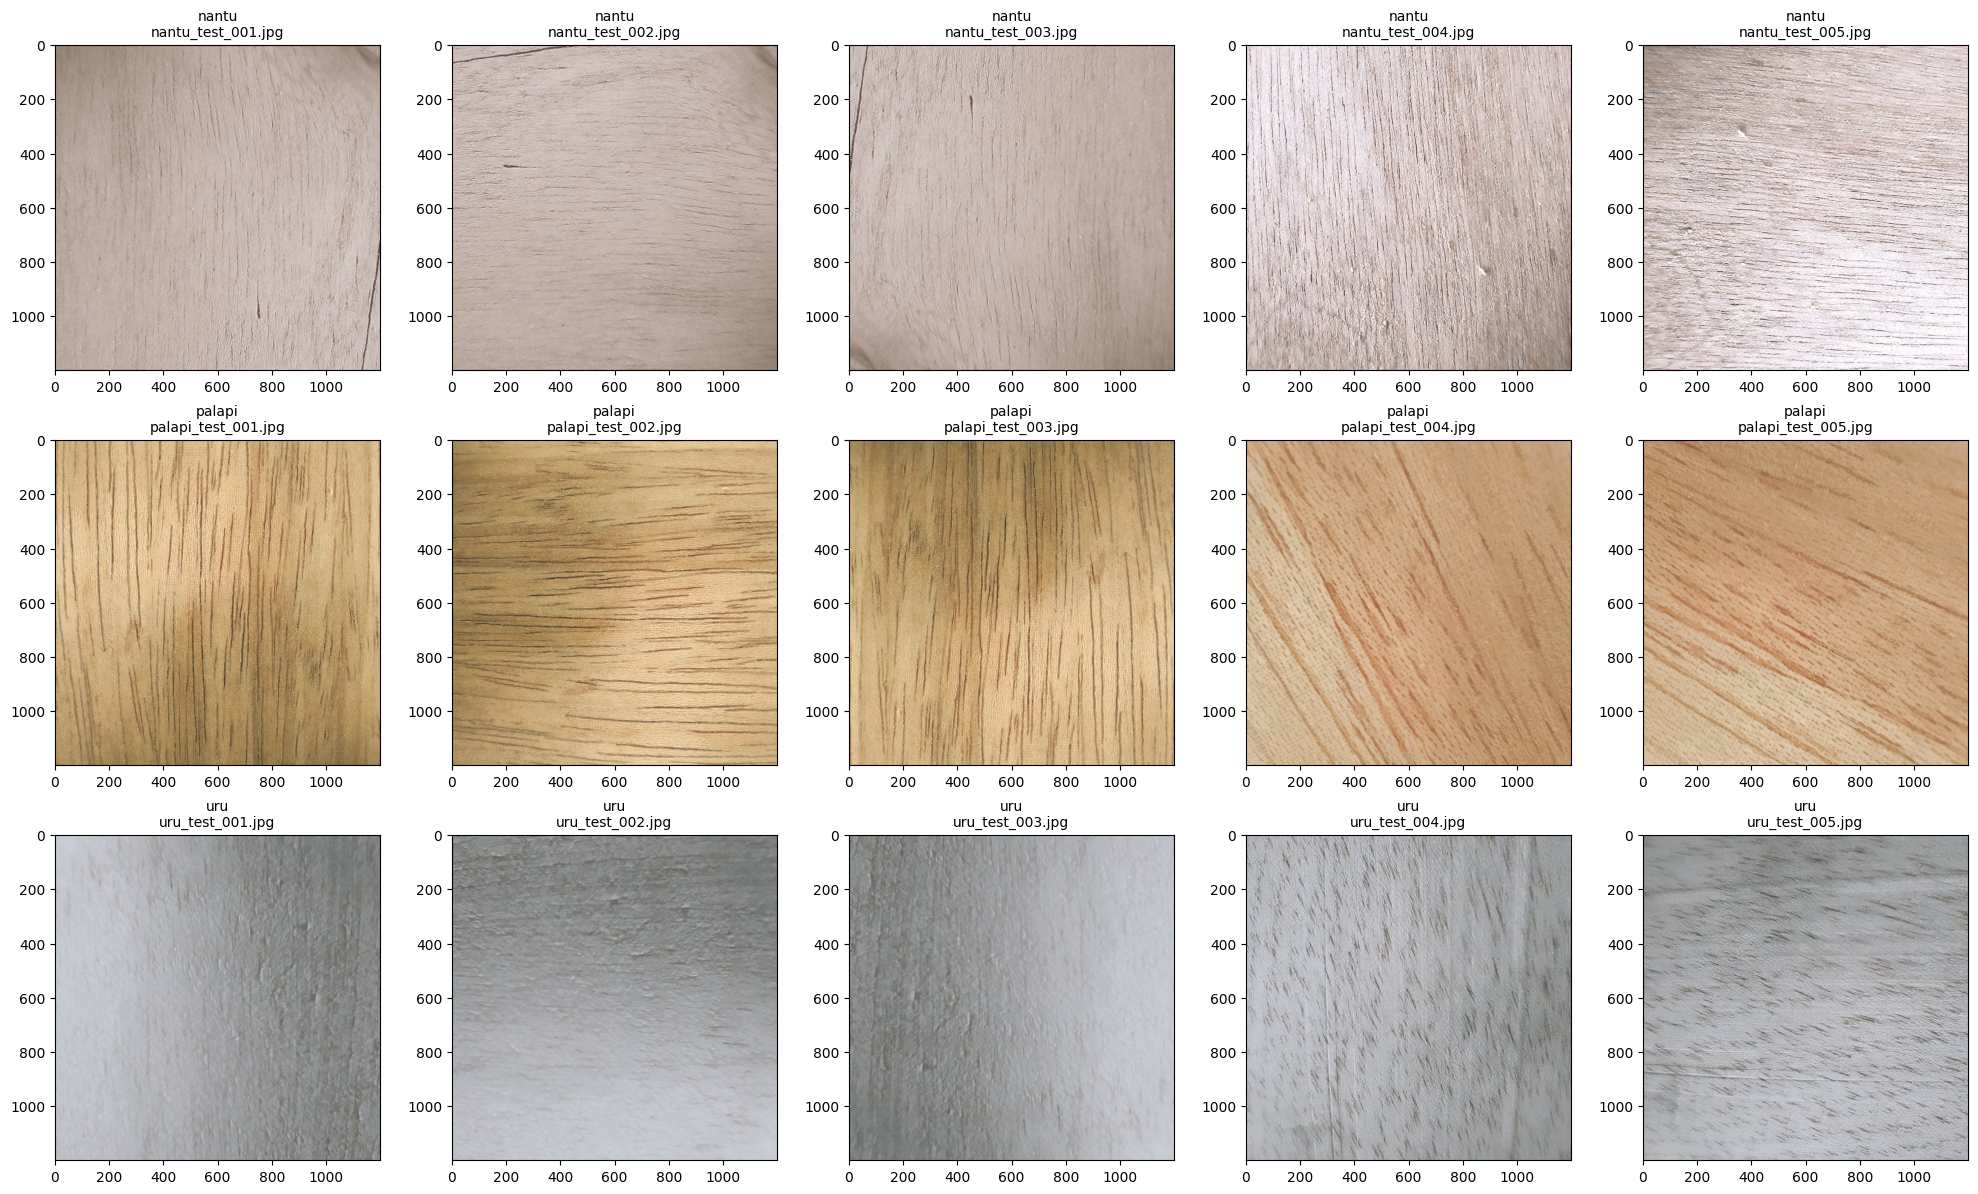

In [57]:
# Direktori dataset
dataset_path = 'serat_kayu'
categories = ['nantu', 'palapi', 'uru']

# Inisialisasi list untuk data, label, dan nama file
data = []
labels = []
file_names = []

# Loop melalui setiap kategori
for label, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    
    # Loop melalui setiap file dalam folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Baca gambar menggunakan OpenCV
        image = cv2.imread(file_path)
        
        # Konversi dari BGR ke RGB (karena OpenCV membaca sebagai BGR)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Tambahkan ke list
        data.append(image_rgb)
        labels.append(label)
        file_names.append(file_name)


# Menampilkan informasi dataset
print(f"Total gambar yang di-load: {len(data)}")
print(f"Kategori: {categories}")

# Menampilkan 5 sampel gambar per label
def show_samples_per_class(n_samples=5):
    plt.figure(figsize=(4 * n_samples, 4 * len(categories)))
    labels_arr = np.array(labels)
    for i, category in enumerate(categories):
        # Cari indeks untuk kelas ini
        idxs = np.where(labels_arr == i)[0][:n_samples]
        for j, idx in enumerate(idxs):
            plt.subplot(len(categories), n_samples, i * n_samples + j + 1)
            plt.imshow(data[idx])
            plt.title(f"{category}\n{file_names[idx]}", fontsize=10)

    plt.tight_layout()
    plt.show()

show_samples_per_class(n_samples=5)

# Data Understanding

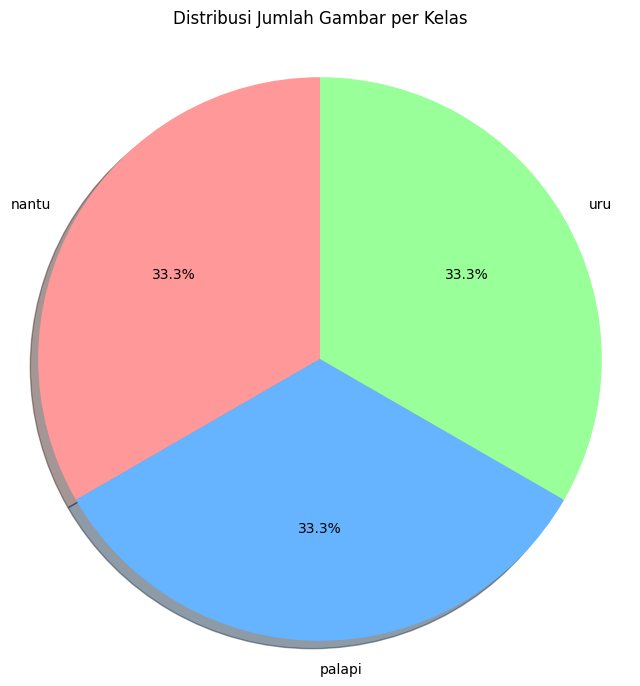


ANALISIS UKURAN GAMBAR:

NANTU:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]

PALAPI:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]

URU:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]


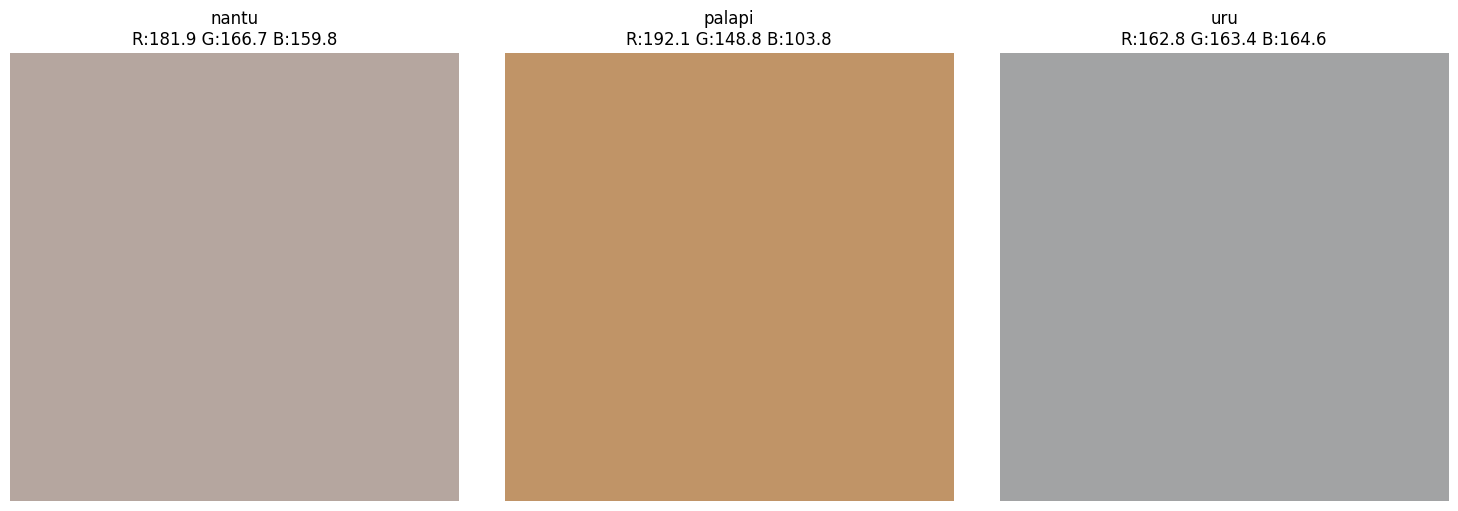

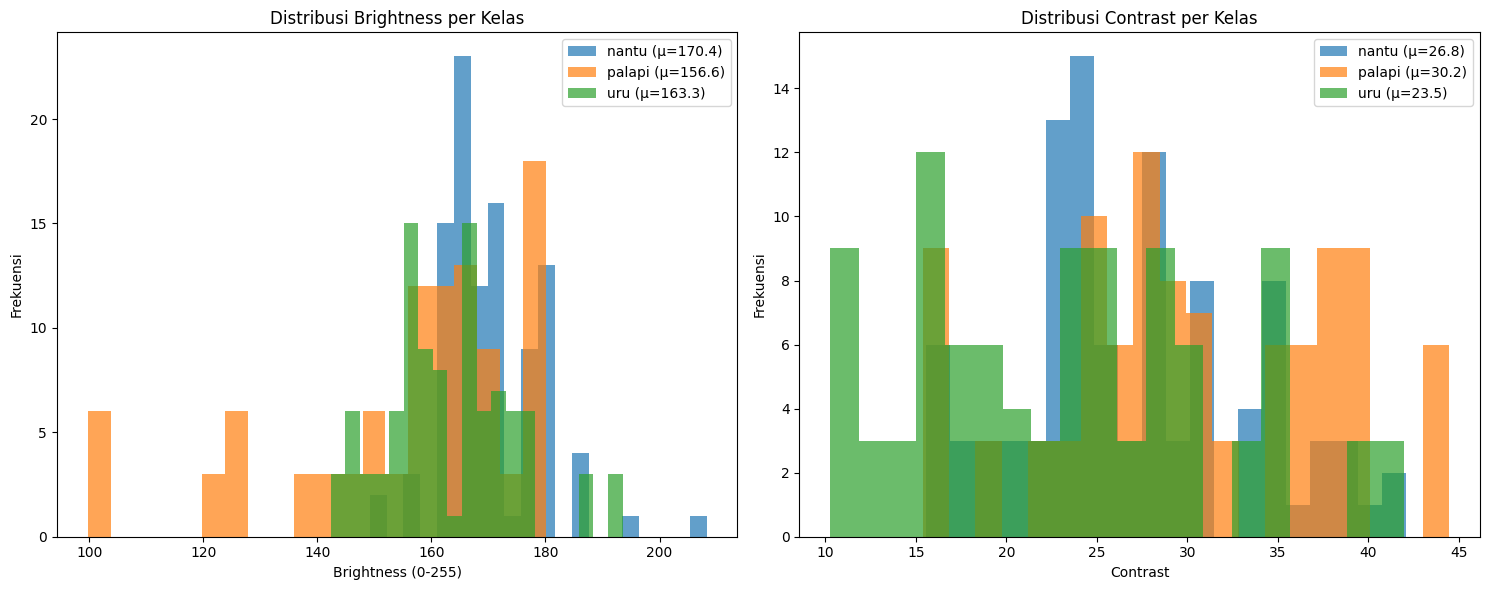

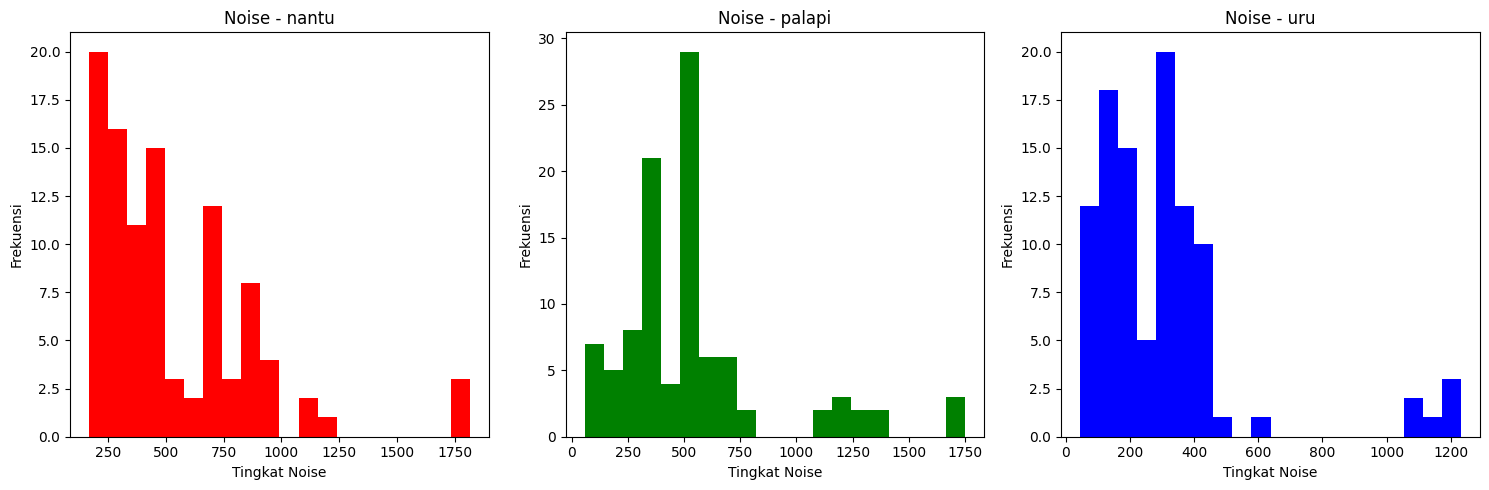


ANALISIS STATISTIK PER KELAS:

NANTU:
  Jumlah Sample: 100
  Warna Rata-rata - R:181.9 G:166.7 B:159.8
  Brightness - μ:170.4 σ:8.8
  Contrast - μ:26.8 σ:6.2
  Noise - μ:531.5 σ:338.4

PALAPI:
  Jumlah Sample: 100
  Warna Rata-rata - R:192.1 G:148.8 B:103.8
  Brightness - μ:156.6 σ:20.6
  Contrast - μ:30.2 σ:7.7
  Noise - μ:535.9 σ:356.0

URU:
  Jumlah Sample: 100
  Warna Rata-rata - R:162.8 G:163.4 B:164.6
  Brightness - μ:163.3 σ:11.4
  Contrast - μ:23.5 σ:8.3
  Noise - μ:303.5 σ:248.4


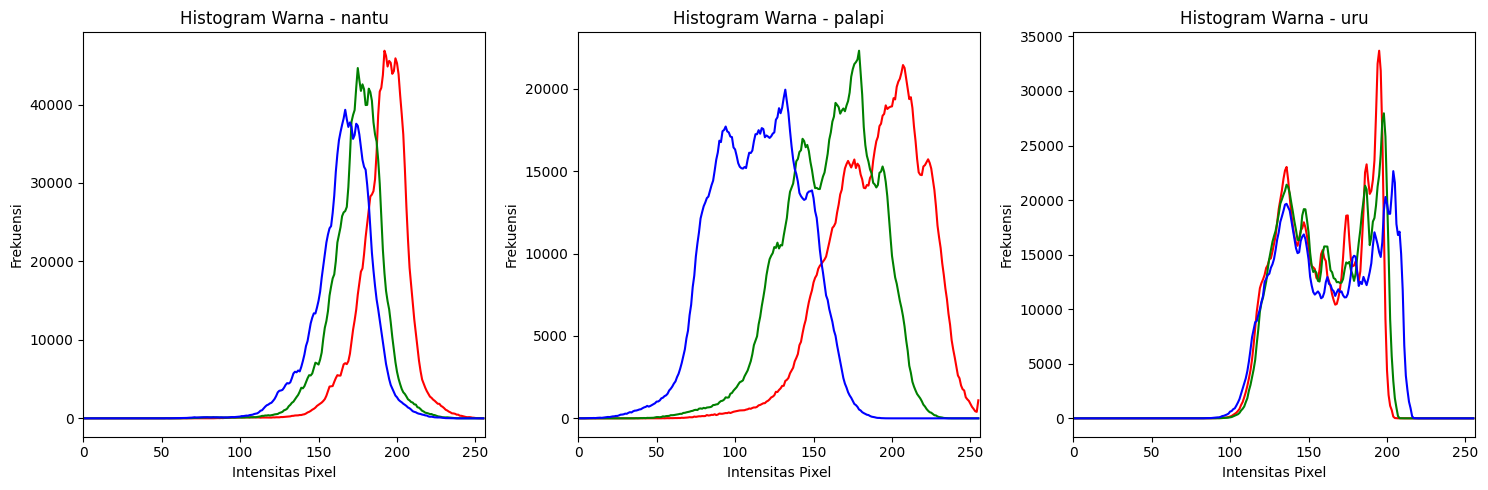

In [58]:
# ANALISIS DISTRIBUSI DATA (PIE CHART)

unique_labels, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99'],
        startangle=90, shadow=True)
plt.title('Distribusi Jumlah Gambar per Kelas', pad=20)
plt.axis('equal')
plt.show()


# ANALISIS RATA-RATA WARNA (3 BERJEJER)

def display_average_colors(color_means, labels_arr, categories):
    plt.figure(figsize=(15, 5))
    color_means = np.array(color_means)
    
    for i, class_name in enumerate(categories):
        class_color_means = color_means[labels_arr == i]
        avg_rgb = np.mean(class_color_means, axis=0)
        
        plt.subplot(1, 3, i+1)
        avg_color = np.zeros((100, 100, 3), dtype=np.uint8)
        avg_color[:, :, :] = avg_rgb
        plt.imshow(avg_color)
        plt.title(f'{class_name.upper()}\nR: {avg_rgb[0]:.1f} - G: {avg_rgb[1]:.1f} - B: {avg_rgb[2]:.1f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# ANALISIS UKURAN GAMBAR

def analyze_image_sizes(images, labels_arr, categories):
    shapes = np.array([img.shape[:2] for img in images])
    
    # Info numerik
    print("\nANALISIS UKURAN GAMBAR:")
    print("=======================")
    for i, class_name in enumerate(categories):
        class_shapes = shapes[labels_arr == i]
        print(f"\n{class_name.upper()}:")
        print(f"  Resolusi rata-rata: {np.mean(class_shapes, axis=0).astype(int)} (P x L)")
        print(f"  Ukuran minimum: {np.min(class_shapes, axis=0)}")
        print(f"  Ukuran maksimum: {np.max(class_shapes, axis=0)}")

labels_arr = np.array(labels)
analyze_image_sizes(data, labels_arr, categories)

# ANALISIS KARAKTERISTIK VISUAL

def analyze_image_properties(images, labels_arr, categories):
    brightness_values = []
    contrast_values = []
    color_means = []
    
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        brightness_values.append(np.mean(gray))
        contrast_values.append(np.std(gray))
        color_means.append(np.mean(img, axis=(0,1)))
    
    brightness_values = np.array(brightness_values)
    contrast_values = np.array(contrast_values)
    color_means = np.array(color_means)
    
    labels_arr = np.array(labels_arr)
    
    
    # ANALISIS RATA-RATA WARNA PER LABEL
    
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        class_color_means = color_means[class_indices]
        avg_rgb = np.mean(class_color_means, axis=0)
        
        plt.subplot(1, 3, i+1)
        avg_color = np.zeros((100, 100, 3), dtype=np.uint8)
        avg_color[:, :, :] = avg_rgb
        plt.imshow(avg_color)
        plt.title(f'{class_name}\nR:{avg_rgb[0]:.1f} G:{avg_rgb[1]:.1f} B:{avg_rgb[2]:.1f}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    
    # ANALISIS BRIGHTNESS DAN CONTRAST
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Brightness
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        ax1.hist(brightness_values[class_indices], bins=20, alpha=0.7, 
                label=f'{class_name} (μ={np.mean(brightness_values[class_indices]):.1f})')
    ax1.set_title('Distribusi Brightness per Kelas')
    ax1.set_xlabel('Brightness (0-255)')
    ax1.set_ylabel('Frekuensi')
    ax1.legend()
    
    # Contrast
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        ax2.hist(contrast_values[class_indices], bins=20, alpha=0.7,
                label=f'{class_name} (μ={np.mean(contrast_values[class_indices]):.1f})')
    ax2.set_title('Distribusi Contrast per Kelas')
    ax2.set_xlabel('Contrast')
    ax2.set_ylabel('Frekuensi')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    
    # ANALISIS NOISE PER LABEL
    
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        noise_levels = []
        
        for idx in class_indices:
            gray = cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY)
            noise = cv2.Laplacian(gray, cv2.CV_64F).var()
            noise_levels.append(noise)
        
        plt.subplot(1, 3, i+1)
        plt.hist(noise_levels, bins=20, color=['red','green','blue'][i])
        plt.title(f'Noise - {class_name}')
        plt.xlabel('Tingkat Noise')
        plt.ylabel('Frekuensi')
    
    plt.tight_layout()
    plt.show()
    
    
    # STATISTIKNYA
    
    print("\nANALISIS STATISTIK PER KELAS:")
    print("============================")
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        
        # Calculate properties
        class_brightness = brightness_values[class_indices]
        class_contrast = contrast_values[class_indices]
        class_colors = color_means[class_indices]
        
        # Calculate noise
        noise_levels = []
        for idx in class_indices:
            gray = cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY)
            noise_levels.append(cv2.Laplacian(gray, cv2.CV_64F).var())
        
        print(f"\n{class_name.upper()}:")
        print(f"  Jumlah Sample: {len(class_indices)}")
        print(f"  Warna Rata-rata - R:{np.mean(class_colors[:,0]):.1f} G:{np.mean(class_colors[:,1]):.1f} B:{np.mean(class_colors[:,2]):.1f}")
        print(f"  Brightness - μ:{np.mean(class_brightness):.1f} σ:{np.std(class_brightness):.1f}")
        print(f"  Contrast - μ:{np.mean(class_contrast):.1f} σ:{np.std(class_contrast):.1f}")
        print(f"  Noise - μ:{np.mean(noise_levels):.1f} σ:{np.std(noise_levels):.1f}")

analyze_image_properties(data, labels_arr, categories)

# ANALISIS HISTOGRAM WARNA

def analyze_color_histograms(images, labels_arr, categories):
    plt.figure(figsize=(15, 5))
    
    for i, class_name in enumerate(categories):
        class_images = [img for img, label in zip(images, labels_arr) if label == i]
        if not class_images:
            continue
        sample_img = class_images[0]
        
        plt.subplot(1, 3, i+1)
        for j, color in enumerate(['red', 'green', 'blue']):
            hist = cv2.calcHist([sample_img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
        
        plt.title(f'Histogram Warna - {class_name}')
        plt.xlabel('Intensitas Pixel')
        plt.ylabel('Frekuensi')
    
    plt.tight_layout()
    plt.show()

analyze_color_histograms(data, labels_arr, categories)

# Percobaan 1

In [59]:
# Fungsi manual untuk konversi ke grayscale (weighted method)
def rgb_to_grayscale(img):
    # Weighted method: 0.299*R + 0.587*G + 0.114*B
    gray = 0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114 * img[:,:,2]
    return gray.astype(np.uint8)

# Fungsi manual untuk histogram equalization
def manual_hist_equalize(gray_img):
    hist, bins = np.histogram(gray_img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    equalized = np.interp(gray_img.flatten(), bins[:-1], cdf_normalized)
    return equalized.reshape(gray_img.shape).astype(np.uint8)

# Fungsi manual untuk Gaussian blur
def manual_gaussian_blur(img, kernel_size=3, sigma=1):
    # Buat kernel Gaussian
    kernel = np.zeros((kernel_size, kernel_size))
    k = kernel_size // 2
    for i in range(-k, k+1):
        for j in range(-k, k+1):
            kernel[i+k, j+k] = np.exp(-(i**2 + j**2)/(2*sigma**2))
    kernel /= kernel.sum()
    
    # Aplikasikan konvolusi
    pad = k
    padded = np.pad(img, pad, mode='reflect')
    output = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i,j] = np.sum(padded[i:i+kernel_size, j:j+kernel_size] * kernel)
    
    return output.astype(np.uint8)

# Fungsi manual untuk Sobel edge detection
def manual_sobel_edge(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    pad = 1
    padded = np.pad(img, pad, mode='reflect')
    grad_x = np.zeros_like(img, dtype=np.float64)
    grad_y = np.zeros_like(img, dtype=np.float64)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            grad_x[i,j] = np.sum(padded[i:i+3, j:j+3] * sobel_x)
            grad_y[i,j] = np.sum(padded[i:i+3, j:j+3] * sobel_y)
    
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = (magnitude / magnitude.max() * 255).astype(np.uint8)
    return magnitude

# Fungsi manual untuk CLAHE
def manual_clahe(img, clip_limit=2.0, tile_size=8):
    h, w = img.shape
    tiles_y = h // tile_size
    tiles_x = w // tile_size
    
    # Proses setiap tile
    output = np.zeros_like(img)
    
    for i in range(tiles_y):
        for j in range(tiles_x):
            # Ekstrak tile
            y_start = i * tile_size
            y_end = (i+1) * tile_size if (i+1) * tile_size <= h else h
            x_start = j * tile_size
            x_end = (j+1) * tile_size if (j+1) * tile_size <= w else w
            
            tile = img[y_start:y_end, x_start:x_end]
            
            # Hitung histogram dan lakukan clipping
            hist, _ = np.histogram(tile.flatten(), 256, [0,256])
            excess = np.sum(np.maximum(hist - clip_limit * hist.mean(), 0))
            hist = np.minimum(hist, clip_limit * hist.mean() + excess/256)
            
            # Hitung CDF dan normalisasi
            cdf = hist.cumsum()
            cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
            
            # Transformasi tile
            tile_equalized = np.interp(tile.flatten(), np.arange(256), cdf)
            output[y_start:y_end, x_start:x_end] = tile_equalized.reshape(tile.shape)
    
    return output.astype(np.uint8)

# Fungsi manual untuk morphological gradient
def manual_morph_gradient(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    pad = kernel_size // 2
    padded = np.pad(img, pad, mode='reflect')
    
    dilated = np.zeros_like(img)
    eroded = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            neighborhood = padded[i:i+kernel_size, j:j+kernel_size]
            dilated[i,j] = np.max(neighborhood)
            eroded[i,j] = np.min(neighborhood)
    
    return dilated - eroded

# Fungsi resize manual (nearest neighbor)
def manual_resize(img, new_size=(256, 256)):
    h, w = img.shape[:2]
    new_h, new_w = new_size
    
    # Untuk grayscale
    if len(img.shape) == 2:
        resized = np.zeros((new_h, new_w), dtype=img.dtype)
        for i in range(new_h):
            for j in range(new_w):
                src_i = int(i * h / new_h)
                src_j = int(j * w / new_w)
                resized[i,j] = img[src_i, src_j]
    else:
        # Untuk warna (tidak digunakan di sini)
        resized = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
        for i in range(new_h):
            for j in range(new_w):
                src_i = int(i * h / new_h)
                src_j = int(j * w / new_w)
                resized[i,j] = img[src_i, src_j]
    
    return resized

# Fungsi Preprocessing 1: Grayscale -> Resize -> Histogram Equalization
def preprocess_1_manual(img):
    # Konversi ke grayscale dulu
    gray = rgb_to_grayscale(img)
    
    # Resize manual
    resized = manual_resize(gray, (256, 256))
    
    # Histogram equalization manual
    equalized = manual_hist_equalize(resized)
    
    return equalized

# Fungsi Preprocessing 2: Grayscale -> Resize -> Hist Equal -> Gaussian Blur -> Edge Detection
def preprocess_2_manual(img):
    # Konversi ke grayscale dulu
    gray = rgb_to_grayscale(img)
    
    # Resize manual
    resized = manual_resize(gray, (256, 256))
    
    # Histogram equalization manual
    equalized = manual_hist_equalize(resized)
    
    # Gaussian blur manual
    blurred = manual_gaussian_blur(equalized)
    
    # Edge detection manual
    edges = manual_sobel_edge(blurred)
    
    return edges

# Fungsi Preprocessing 3: Grayscale -> Resize -> CLAHE -> Gaussian Blur -> Morph Gradient
def preprocess_3_manual(img):
    # Konversi ke grayscale dulu
    gray = rgb_to_grayscale(img)
    
    # Resize manual
    resized = manual_resize(gray, (256, 256))
    
    # CLAHE manual
    clahe_img = manual_clahe(resized)
    
    # Gaussian blur manual
    blurred = manual_gaussian_blur(clahe_img)
    
    # Morphological gradient manual
    morph = manual_morph_gradient(blurred)
    
    return morph

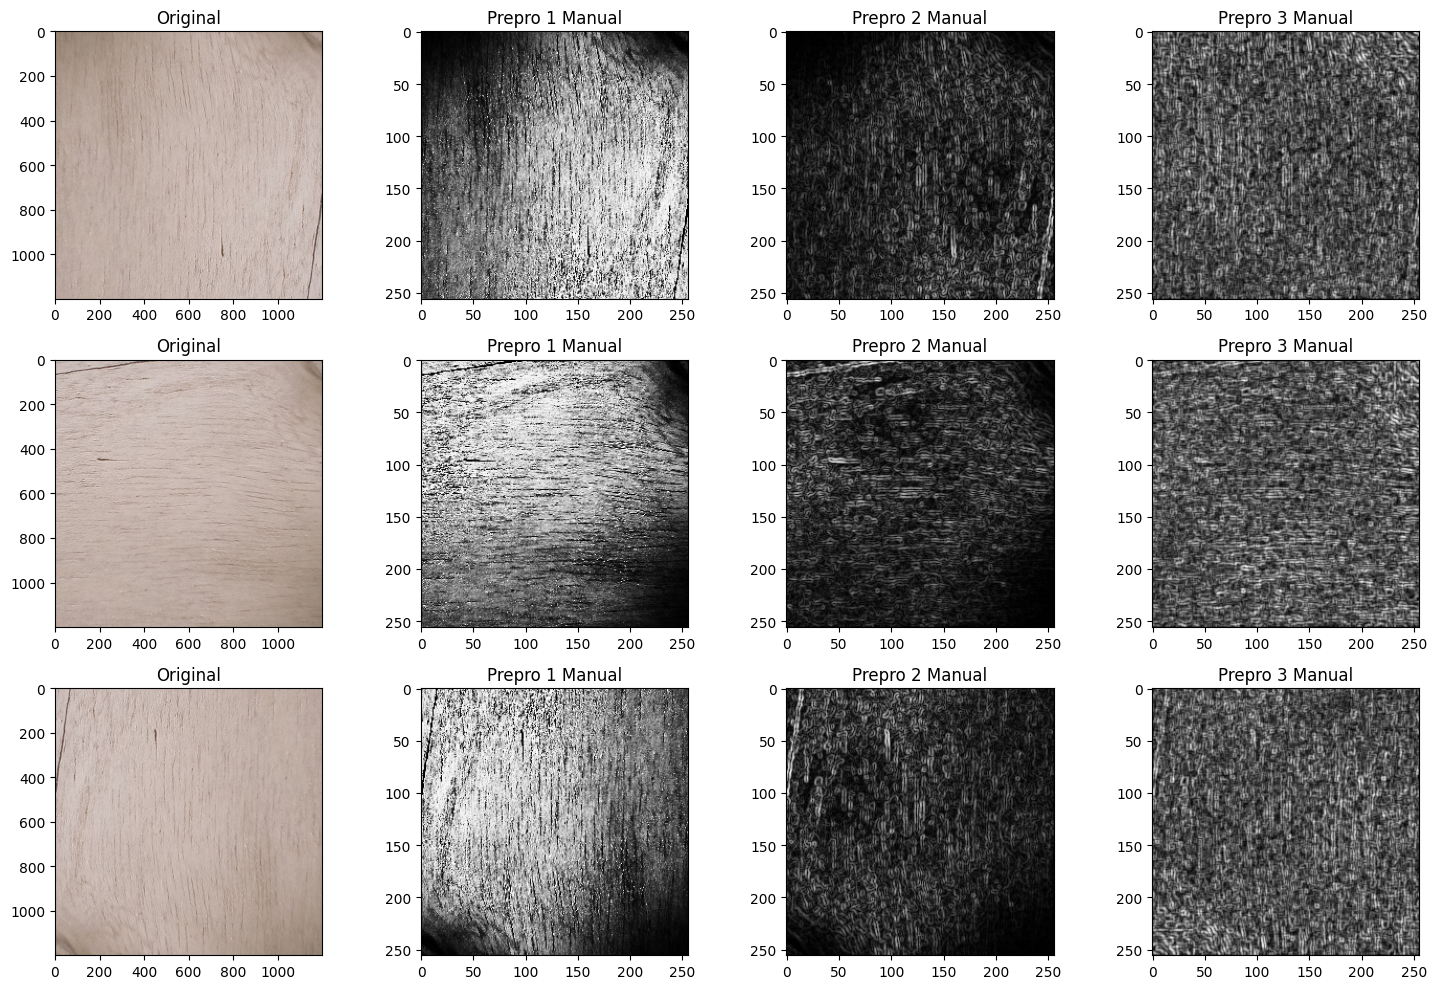

In [60]:
# Terapkan preprocessing manual ke seluruh dataset
hasil_prepro_1_manual = np.array([preprocess_1_manual(img) for img in data])
hasil_prepro_2_manual = np.array([preprocess_2_manual(img) for img in data])
hasil_prepro_3_manual = np.array([preprocess_3_manual(img) for img in data])

# Contoh visualisasi hasil preprocessing manual
plt.figure(figsize=(15,10))
for i in range(3):  # Tampilkan 3 sampel pertama
    plt.subplot(3, 4, i*4+1)
    plt.imshow(data[i])
    plt.title('Original')
    
    plt.subplot(3, 4, i*4+2)
    plt.imshow(hasil_prepro_1_manual[i], cmap='gray')
    plt.title('Prepro 1 Manual')
    
    plt.subplot(3, 4, i*4+3)
    plt.imshow(hasil_prepro_2_manual[i], cmap='gray')
    plt.title('Prepro 2 Manual')
    
    plt.subplot(3, 4, i*4+4)
    plt.imshow(hasil_prepro_3_manual[i], cmap='gray')
    plt.title('Prepro 3 Manual')

plt.tight_layout()
plt.show()

In [61]:
# 1. Fungsi untuk menghitung GLCM manual
def calculate_glcm(image, distances, angles, levels=256):
    """
    Menghitung Gray-Level Co-occurrence Matrix (GLCM) secara manual
    
    Parameters:
        image: Gambar input (2D numpy array)
        distances: List jarak pixel (misal [1, 2, 3])
        angles: List sudut dalam radian (misal [0, np.pi/4, np.pi/2, 3*np.pi/4])
        levels: Jumlah level intensitas (default 256)
    
    Returns:
        Dictionary dengan key (distance, angle) dan value GLCM matrix
    """
    glcm_results = {}
    height, width = image.shape
    
    for d in distances:
        for angle in angles:
            # Inisialisasi matrix GLCM
            glcm = np.zeros((levels, levels), dtype=np.uint32)
            
            # Hitung offset berdasarkan angle
            if angle == 0:  # 0°
                dx, dy = d, 0
            elif angle == np.pi/4:  # 45°
                dx, dy = d, -d
            elif angle == np.pi/2:  # 90°
                dx, dy = 0, -d
            elif angle == 3*np.pi/4:  # 135°
                dx, dy = -d, -d
            else:
                raise ValueError("Angle not supported")
            
            # Bangun GLCM
            for i in range(height):
                for j in range(width):
                    # Cek boundary
                    if 0 <= i + dx < height and 0 <= j + dy < width:
                        pixel_val = image[i, j]
                        neighbor_val = image[i + dx, j + dy]
                        glcm[pixel_val, neighbor_val] += 1
            
            # Normalisasi GLCM
            glcm = glcm.astype(np.float32)
            if glcm.sum() > 0:
                glcm /= glcm.sum()
            
            glcm_results[(d, angle)] = glcm
    
    return glcm_results

# 2. Fungsi untuk menghitung fitur tekstur dari GLCM
def compute_texture_features(glcm_matrix):
    """
    Menghitung berbagai fitur tekstur dari GLCM
    
    Parameters:
        glcm_matrix: Matrix GLCM yang sudah dinormalisasi
    
    Returns:
        Dictionary berisi fitur-fitur tekstur
    """
    features = {}
    levels = glcm_matrix.shape[0]
    
    # Inisialisasi array untuk perhitungan
    i, j = np.indices((levels, levels))
    
    # 1. Contrast
    contrast = np.sum(glcm_matrix * (i - j)**2)
    features['contrast'] = contrast
    
    # 2. Dissimilarity
    dissimilarity = np.sum(glcm_matrix * np.abs(i - j))
    features['dissimilarity'] = dissimilarity
    
    # 3. Homogeneity
    homogeneity = np.sum(glcm_matrix / (1 + (i - j)**2))
    features['homogeneity'] = homogeneity
    
    # 4. Energy (ASM)
    asm = np.sum(glcm_matrix**2)
    features['energy'] = np.sqrt(asm)
    
    # 5. Entropy
    entropy = -np.sum(glcm_matrix * np.log(glcm_matrix + (glcm_matrix == 0)))
    features['entropy'] = entropy
    
    # 6. Correlation
    # Hitung mean dan std dev
    mean_i = np.sum(i * glcm_matrix)
    mean_j = np.sum(j * glcm_matrix)
    
    std_i = np.sqrt(np.sum((i - mean_i)**2 * glcm_matrix))
    std_j = np.sqrt(np.sum((j - mean_j)**2 * glcm_matrix))
    
    if std_i > 0 and std_j > 0:
        correlation = np.sum(glcm_matrix * (i - mean_i) * (j - mean_j)) / (std_i * std_j)
    else:
        correlation = 0
    features['correlation'] = correlation
    
    return features

# 3. Fungsi ekstraksi fitur dari gambar
def extract_features(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    """
    Ekstraksi fitur GLCM dari sebuah gambar
    
    Parameters:
        image: Gambar input (2D numpy array)
        distances: List jarak pixel
        angles: List sudut dalam radian
    
    Returns:
        Dictionary berisi semua fitur untuk semua kombinasi distance dan angle
    """
    # Hitung GLCM
    glcm_dict = calculate_glcm(image, distances, angles)
    
    # Hitung fitur untuk setiap GLCM
    all_features = {}
    for (d, angle), glcm in glcm_dict.items():
        angle_deg = int(np.degrees(angle))
        prefix = f"d{d}_a{angle_deg}"
        
        features = compute_texture_features(glcm)
        for name, value in features.items():
            all_features[f"{prefix}_{name}"] = value
    
    return all_features

# 4. Fungsi seleksi fitur
def select_features(feature_list, variance_threshold=0.01):
    """
    Seleksi fitur berdasarkan variance threshold
    
    Parameters:
        feature_list: List of dictionaries (fitur untuk setiap sampel)
        variance_threshold: Threshold variance untuk seleksi
    
    Returns:
        selected_features: List nama fitur yang terpilih
        selected_indices: Indices fitur yang terpilih
    """
    # Konversi ke array numpy
    feature_names = list(feature_list[0].keys())
    num_samples = len(feature_list)
    num_features = len(feature_names)
    
    feature_matrix = np.zeros((num_samples, num_features))
    for i, sample in enumerate(feature_list):
        feature_matrix[i] = [sample[name] for name in feature_names]
    
    # Hitung variance setiap fitur
    variances = np.var(feature_matrix, axis=0)
    
    # Seleksi fitur
    selected_indices = np.where(variances > variance_threshold)[0]
    selected_features = [feature_names[i] for i in selected_indices]
    
    return selected_features, selected_indices

In [ ]:
# 5. Penerapan pada semua hasil preprocessing
# Parameter GLCM
distances = [1, 2]  # Jarak pixel
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Sudut

# Untuk menyimpan hasil
feature_results = {
    'prepro1': {'X': None, 'features': None},
    'prepro2': {'X': None, 'features': None},
    'prepro3': {'X': None, 'features': None}
}

# Proses Preprocessing 1
print("Memproses Preprocessing 1...")
features_prepro1 = [extract_features(img, distances, angles) for img in hasil_prepro_1_manual]
selected_features_prepro1, _ = select_features(features_prepro1)
X_prepro1 = np.array([[sample[feat] for feat in selected_features_prepro1] for sample in features_prepro1])
feature_results['prepro1']['X'] = X_prepro1
feature_results['prepro1']['features'] = selected_features_prepro1

# Proses Preprocessing 2
print("Memproses Preprocessing 2...")
features_prepro2 = [extract_features(img, distances, angles) for img in hasil_prepro_2_manual]
selected_features_prepro2, _ = select_features(features_prepro2)
X_prepro2 = np.array([[sample[feat] for feat in selected_features_prepro2] for sample in features_prepro2])
feature_results['prepro2']['X'] = X_prepro2
feature_results['prepro2']['features'] = selected_features_prepro2

# Proses Preprocessing 3
print("Memproses Preprocessing 3...")
features_prepro3 = [extract_features(img, distances, angles) for img in hasil_prepro_3_manual]
selected_features_prepro3, _ = select_features(features_prepro3)
X_prepro3 = np.array([[sample[feat] for feat in selected_features_prepro3] for sample in features_prepro3])
feature_results['prepro3']['X'] = X_prepro3
feature_results['prepro3']['features'] = selected_features_prepro3

# Cetak hasil
print("\nHasil Ekstraksi Fitur:")
for prepro in ['prepro1', 'prepro2', 'prepro3']:
    print(f"{prepro}:")
    print(f"  Jumlah fitur terpilih: {len(feature_results[prepro]['features'])}")
    print(f"  Dimensi matriks fitur: {feature_results[prepro]['X'].shape}")
    print(f"  5 fitur pertama: {feature_results[prepro]['features'][:5]}\n")

Memproses Preprocessing 1...
Memproses Preprocessing 2...
Memproses Preprocessing 3...

Hasil Ekstraksi Fitur:
prepro1:
  Jumlah fitur terpilih: 32
  Dimensi matriks fitur: (300, 32)
  5 fitur pertama: ['d1_a0_contrast', 'd1_a0_dissimilarity', 'd1_a0_entropy', 'd1_a0_correlation', 'd1_a45_contrast']

prepro2:
  Jumlah fitur terpilih: 28
  Dimensi matriks fitur: (300, 28)
  5 fitur pertama: ['d1_a0_contrast', 'd1_a0_dissimilarity', 'd1_a0_entropy', 'd1_a0_correlation', 'd1_a45_contrast']

prepro3:
  Jumlah fitur terpilih: 28
  Dimensi matriks fitur: (300, 28)
  5 fitur pertama: ['d1_a0_contrast', 'd1_a0_dissimilarity', 'd1_a0_entropy', 'd1_a0_correlation', 'd1_a45_contrast']



In [63]:
def split_data_by_class(prepro_data, labels_arr, n_train=80, n_test=20, random_state=42):
    """
    Membagi dataset menjadi training dan testing dengan proporsi per kelas
    
    Parameters:
        prepro_data: Array hasil preprocessing (n_samples, height, width)
        labels_arr: Array label kelas (n_samples,)
        n_train: Jumlah sampel training per kelas
        n_test: Jumlah sampel testing per kelas
        random_state: Seed untuk reproduktibilitas
    
    Returns:
        X_train: Data training (n_train*n_class, height, width)
        X_test: Data testing (n_test*n_class, height, width)
        y_train: Label training (n_train*n_class,)
        y_test: Label testing (n_test*n_class,)
        train_idx: Indices data training
        test_idx: Indices data testing
    """
    np.random.seed(random_state)
    unique_classes = np.unique(labels_arr)
    train_idx = []
    test_idx = []
    
    for cls in unique_classes:
        # Dapatkan semua indeks untuk kelas saat ini
        idx_cls = np.where(labels_arr == cls)[0]
        
        # Acak urutan indeks
        np.random.shuffle(idx_cls)
        
        # Validasi jumlah sampel
        if len(idx_cls) < n_train + n_test:
            raise ValueError(f"Kelas {cls} hanya memiliki {len(idx_cls)} sampel, tidak cukup untuk {n_train} training dan {n_test} testing")
        
        # Tambahkan ke training dan testing
        train_idx.extend(idx_cls[:n_train])
        test_idx.extend(idx_cls[n_train:n_train + n_test])
    
    # Konversi ke numpy array
    train_idx = np.array(train_idx)
    test_idx = np.array(test_idx)
    
    # Split data dan label
    X_train = prepro_data[train_idx]
    X_test = prepro_data[test_idx]
    y_train = labels_arr[train_idx]
    y_test = labels_arr[test_idx]
    
    return X_train, X_test, y_train, y_test, train_idx, test_idx

# Contoh penggunaan:
# Asumsikan:
# - hasil_prepro_1_manual, hasil_prepro_2_manual, hasil_prepro_3_manual adalah hasil preprocessing
# - labels_arr adalah array label kelas untuk semua sampel

# Split untuk Preprocessing 1
X_train1, X_test1, y_train1, y_test1, train_idx1, test_idx1 = split_data_by_class(
    hasil_prepro_1_manual, labels_arr)

# Split untuk Preprocessing 2
X_train2, X_test2, y_train2, y_test2, train_idx2, test_idx2 = split_data_by_class(
    hasil_prepro_2_manual, labels_arr)

# Split untuk Preprocessing 3
X_train3, X_test3, y_train3, y_test3, train_idx3, test_idx3 = split_data_by_class(
    hasil_prepro_3_manual, labels_arr)

# Verifikasi hasil split
def print_split_info(X_train, X_test, y_train, y_test, name):
    print(f"\nSplit Info untuk {name}:")
    print(f"Jumlah kelas unik: {len(np.unique(y_train))}")
    print(f"Shape X_train: {X_train.shape}")
    print(f"Shape X_test: {X_test.shape}")
    print(f"Jumlah sampel training per kelas: {len(y_train)//len(np.unique(y_train))}")
    print(f"Jumlah sampel testing per kelas: {len(y_test)//len(np.unique(y_test))}")
    print("Distribusi kelas training:", np.bincount(y_train))
    print("Distribusi kelas testing:", np.bincount(y_test))

print_split_info(X_train1, X_test1, y_train1, y_test1, "Preprocessing 1")
print_split_info(X_train2, X_test2, y_train2, y_test2, "Preprocessing 2")
print_split_info(X_train3, X_test3, y_train3, y_test3, "Preprocessing 3")


Split Info untuk Preprocessing 1:
Jumlah kelas unik: 3
Shape X_train: (240, 256, 256)
Shape X_test: (60, 256, 256)
Jumlah sampel training per kelas: 80
Jumlah sampel testing per kelas: 20
Distribusi kelas training: [80 80 80]
Distribusi kelas testing: [20 20 20]

Split Info untuk Preprocessing 2:
Jumlah kelas unik: 3
Shape X_train: (240, 256, 256)
Shape X_test: (60, 256, 256)
Jumlah sampel training per kelas: 80
Jumlah sampel testing per kelas: 20
Distribusi kelas training: [80 80 80]
Distribusi kelas testing: [20 20 20]

Split Info untuk Preprocessing 3:
Jumlah kelas unik: 3
Shape X_train: (240, 256, 256)
Shape X_test: (60, 256, 256)
Jumlah sampel training per kelas: 80
Jumlah sampel testing per kelas: 20
Distribusi kelas training: [80 80 80]
Distribusi kelas testing: [20 20 20]
